In [4]:
import patatmo
import pandas
import time
import os
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [53]:
data_cleaned = pd.read_csv('datacleaned.csv',index_col='time',parse_dates=['time'] )

In [7]:
data_cleaned1 = pd.read_csv('datacleaned2019.csv',index_col='time',parse_dates=['time'] )

In [8]:
data_cleaned_grp1 = data_cleaned1.groupby('station_id').resample('D').mean()
data_cleaned_grp_grp1 = data_cleaned_grp1.reset_index().groupby('station_id')

In [7]:
data_cleaned.corr(method = 'pearson')

,Unnamed: 0,Temperature,Humidity,latitude,longitude,year,month,day
Unnamed: 0,1.000000,0.169341,0.158607,-0.010599,0.007896,NaN,0.981547,0.095409
Temperature,0.169341,1.000000,-0.606012,0.007197,-0.008261,NaN,0.165282,0.094245
Humidity,0.158607,-0.606012,1.000000,-0.017879,-0.019028,NaN,0.162604,-0.051944
latitude,-0.010599,0.007197,-0.017879,1.000000,0.190545,NaN,-0.003884,-0.001925
longitude,0.007896,-0.008261,-0.019028,0.190545,1.000000,NaN,0.000676,-0.000224
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.981547,0.165282,0.162604,-0.003884,0.000676,NaN,1.000000,0.013582
day,0.095409,0.094245,-0.051944,-0.001925,-0.000224,NaN,0.013582,1.000000


In [9]:
data_cleaned_grp = data_cleaned.groupby('station_id').resample('D').mean()
data_cleaned_grp_grp = data_cleaned_grp.reset_index().groupby('station_id')

In [10]:
data_bleriotlaan = pd.read_csv('bleriotlaan_data.csv',index_col='time',parse_dates=['time'] )

In [11]:
data_bleriotlaan

,pm10,o3,no2
time,,,
2019-01-01,41.0,31.0,6
2019-01-02,22.0,27.0,14
2019-01-03,12.0,24.0,9
2019-01-04,15.0,26.0,4
2019-01-05,13.0,26.0,10
...,...,...,...
2019-12-27,16.0,1.0,20
2019-12-28,21.0,2.0,19
2019-12-29,NaN,NaN,NaN


In [12]:
bleriotlaan = data_cleaned_grp_grp1.get_group('70:ee:50:1c:7b:80')
bleriotlaan

,station_id,time,Unnamed: 0,Unnamed: 0.1,Temperature,CO2,Humidity,Pressure,Noise,Rain,WindStrength,WindAngle,GustStrength,GustAngle,latitude,longitude,year,month,day
10950,70:ee:50:1c:7b:80,2019-01-01 00:00:00+00:00,11718454.0,286.0,8.086891,NaN,84.719101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,1.0,1.0
10951,70:ee:50:1c:7b:80,2019-01-02 00:00:00+00:00,11718719.0,551.0,6.134601,NaN,80.570342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,1.0,2.0
10952,70:ee:50:1c:7b:80,2019-01-03 00:00:00+00:00,11718984.0,816.0,4.575281,NaN,94.689139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,1.0,3.0
10953,70:ee:50:1c:7b:80,2019-01-04 00:00:00+00:00,11719263.5,1095.5,5.765068,NaN,88.534247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,1.0,4.0
10954,70:ee:50:1c:7b:80,2019-01-05 00:00:00+00:00,11719552.5,1384.5,7.327622,NaN,88.926573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11310,70:ee:50:1c:7b:80,2019-12-27 00:00:00+00:00,11823004.0,104836.0,4.048772,NaN,98.796491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,12.0,27.0
11311,70:ee:50:1c:7b:80,2019-12-28 00:00:00+00:00,11823290.0,105122.0,1.987108,NaN,99.031359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,12.0,28.0
11312,70:ee:50:1c:7b:80,2019-12-29 00:00:00+00:00,11823583.5,105415.5,2.445333,NaN,93.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,12.0,29.0
11313,70:ee:50:1c:7b:80,2019-12-30 00:00:00+00:00,11823877.5,105709.5,4.401389,NaN,83.121528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.039369,4.366319,2019.0,12.0,30.0


In [14]:
ruralstation = data_cleaned_grp_grp1.get_group('70:ee:50:03:60:90')
ruralstation
ruraltemp = ruralstation.Temperature
ruraltemp

3650    7.676208
3651    5.797509
3652    3.077519
3653    5.297251
3654    7.041404
          ...   
4010    4.383916
4011    2.193567
4012    2.238934
4013    4.603873
4014    5.237801
Name: Temperature, Length: 365, dtype: float64

In [15]:
bleriotlaan = bleriotlaan.drop(['time','station_id', 'Unnamed: 0', 'Humidity', 'latitude', 'longitude', 'year', 'month', 'day'], axis=1)

In [16]:
Temperatuur = []
for i in bleriotlaan.Temperature:
    value = i
    print(value)
    Temperatuur.append(value)
    
print(len(Temperatuur))

8.086891385767785
6.134600760456275
4.575280898876404
5.765068493150699
7.327622377622379
6.787279151943446
7.948000000000002
7.442013888888888
5.101045296167254
4.116666666666666
7.588000000000009
7.9790940766550555
8.791637630662043
5.860000000000006
6.963541666666666
6.48118466898955
3.893055555555558
0.3607973421926909
-0.63951048951049
-2.4250000000000007
-1.283999999999999
-0.10975609756097528
-0.16620209059233435
0.6393728222996515
2.600666666666669
7.665277777777778
5.877121771217701
4.3166112956810645
1.7878048780487814
1.3048611111111108
-0.08263888888888883
1.253666666666666
3.1319444444444486
2.4968749999999975
2.227986348122869
4.6241379310344835
5.453819444444438
7.551916376306627
7.857333333333333
8.177351916376303
6.221874999999994
5.248958333333335
5.231666666666665
6.636585365853659
5.126989619377161
5.398999999999999
6.9714285714285715
6.9362369337979075
7.5487889273356386
7.354180602006692
7.54912891986062
8.063541666666664
9.581333333333335
7.3766550522648044
6.041

In [17]:
data_bleriotlaan['Temperatuur'] = Temperatuur
data_bleriotlaan

,pm10,o3,no2,Temperatuur
time,,,,
2019-01-01,41.0,31.0,6,8.086891
2019-01-02,22.0,27.0,14,6.134601
2019-01-03,12.0,24.0,9,4.575281
2019-01-04,15.0,26.0,4,5.765068
2019-01-05,13.0,26.0,10,7.327622
...,...,...,...,...
2019-12-27,16.0,1.0,20,4.048772
2019-12-28,21.0,2.0,19,1.987108
2019-12-29,NaN,NaN,NaN,2.445333


In [18]:
data_bleriotlaan1 = data_bleriotlaan.apply(pd.to_numeric, errors='coerce')
data_bleriotlaan1.dtypes

 pm10          float64
 o3            float64
 no2           float64
Temperatuur    float64
dtype: object

In [19]:
data_bleriotlaan1.corr(method = 'pearson')

,pm10,o3,no2,Temperatuur
pm10,1.000000,0.115448,0.187000,-0.080637
o3,0.115448,1.000000,-0.391253,0.588929
no2,0.187000,-0.391253,1.000000,-0.456337
Temperatuur,-0.080637,0.588929,-0.456337,1.000000


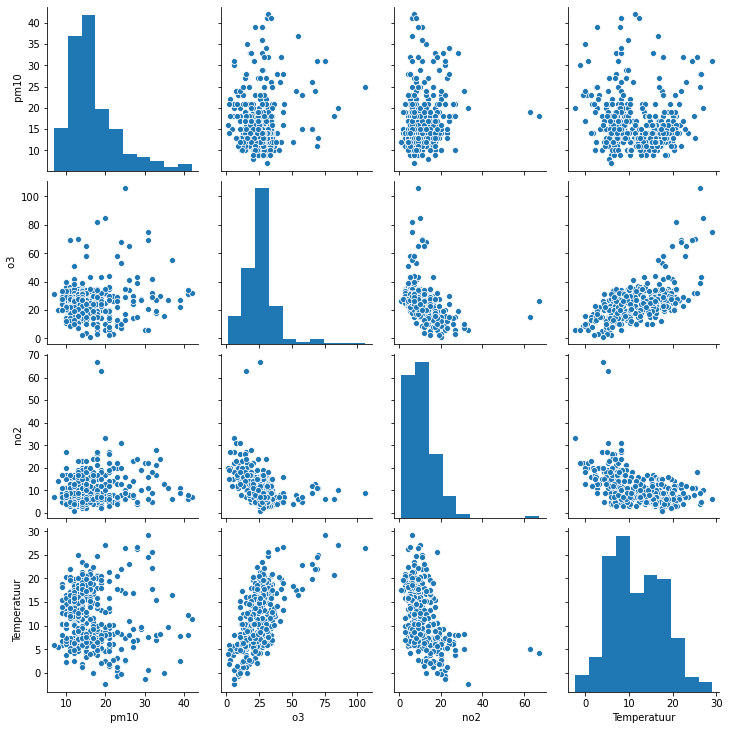

In [20]:
sns.pairplot(data_bleriotlaan1)

In [21]:
amsterdamse_veerkade = pd.read_csv('amsterdamse_veerkade.csv',index_col='time',parse_dates=['time'] )
print(len(amsterdamse_veerkade))

365


In [22]:
amsterdamseveer = data_cleaned_grp_grp1.get_group('70:ee:50:03:bd:3e')
amsterdamseveer

,station_id,time,Unnamed: 0,Unnamed: 0.1,Temperature,CO2,Humidity,Pressure,Noise,Rain,WindStrength,WindAngle,GustStrength,GustAngle,latitude,longitude,year,month,day
4015,70:ee:50:03:bd:3e,2019-01-01 00:00:00+00:00,3926941.0,294.0,7.484698,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,1.0,1.0
4016,70:ee:50:03:bd:3e,2019-01-02 00:00:00+00:00,3927223.5,576.5,5.626761,NaN,99.936620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,1.0,2.0
4017,70:ee:50:03:bd:3e,2019-01-03 00:00:00+00:00,3927503.0,856.0,4.239636,NaN,99.185455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,1.0,3.0
4018,70:ee:50:03:bd:3e,2019-01-04 00:00:00+00:00,3927789.0,1142.0,5.287205,NaN,99.292929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,1.0,4.0
4019,70:ee:50:03:bd:3e,2019-01-05 00:00:00+00:00,3928081.5,1434.5,7.011111,NaN,99.861111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,70:ee:50:03:bd:3e,2019-12-27 00:00:00+00:00,4031687.0,105040.0,4.724913,NaN,98.103806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,12.0,27.0
4376,70:ee:50:03:bd:3e,2019-12-28 00:00:00+00:00,4031983.0,105336.0,3.243894,NaN,99.508251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,12.0,28.0
4377,70:ee:50:03:bd:3e,2019-12-29 00:00:00+00:00,4032282.0,105635.0,3.444068,NaN,93.508475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,12.0,29.0
4378,70:ee:50:03:bd:3e,2019-12-30 00:00:00+00:00,4032525.5,105878.5,4.714062,NaN,82.286458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081973,4.293458,2019.0,12.0,30.0


In [23]:
amsterdamseveer = amsterdamseveer.drop(['time','station_id', 'Unnamed: 0', 'Humidity', 'latitude', 'longitude', 'year', 'month', 'day'], axis=1)

In [24]:
Temperatuur1 = []
for i in amsterdamseveer.Temperature:
    value = i
    print(value)
    Temperatuur1.append(value)
    
print(len(Temperatuur1))

7.4846975088968
5.626760563380284
4.23963636363636
5.287205387205385
7.011111111111113
6.529310344827578
7.743000000000008
6.339583333333333
4.14290657439447
4.216376306620208
7.39866666666666
7.390657439446358
7.985467128027685
4.996688741721856
6.921951219512196
6.3200692041522455
3.4839721254355376
1.4294701986754972
0.03275261324041818
-1.2284722222222224
0.2827242524916934
-0.14808362369337963
0.07395833333333329
0.7266435986159169
2.4176666666666664
7.211805555555551
5.657241379310345
3.8900332225913603
2.2034843205574925
1.3855172413793109
-0.12857142857142845
1.0143812709030107
3.325517241379314
2.840484429065741
2.075747508305647
4.879861111111108
5.4539792387543224
7.174216027874562
7.37692307692307
7.939583333333338
6.145454545454545
4.285333333333334
6.27351916376306
6.982291666666663
6.857093425605535
8.462126245847184
8.893771626297573
9.438194444444445
9.998675496688753
7.9913494809688626
8.320069204152244
8.20972222222222
9.257333333333332
8.835069444444443
8.8408934707

In [25]:
amsterdamse_veerkade['Temperatuur'] = Temperatuur1

In [26]:
amsterdamse_veerkade1 = amsterdamse_veerkade.apply(pd.to_numeric, errors='coerce')
amsterdamse_veerkade1.dtypes

 pm10          float64
 o3            float64
 no2           float64
Temperatuur    float64
dtype: object

In [27]:
amsterdamse_veerkade1.corr(method = 'pearson')

,pm10,o3,no2,Temperatuur
pm10,1.000000,-0.064917,0.233114,-0.127752
o3,-0.064917,1.000000,-0.345948,0.646008
no2,0.233114,-0.345948,1.000000,-0.331018
Temperatuur,-0.127752,0.646008,-0.331018,1.000000


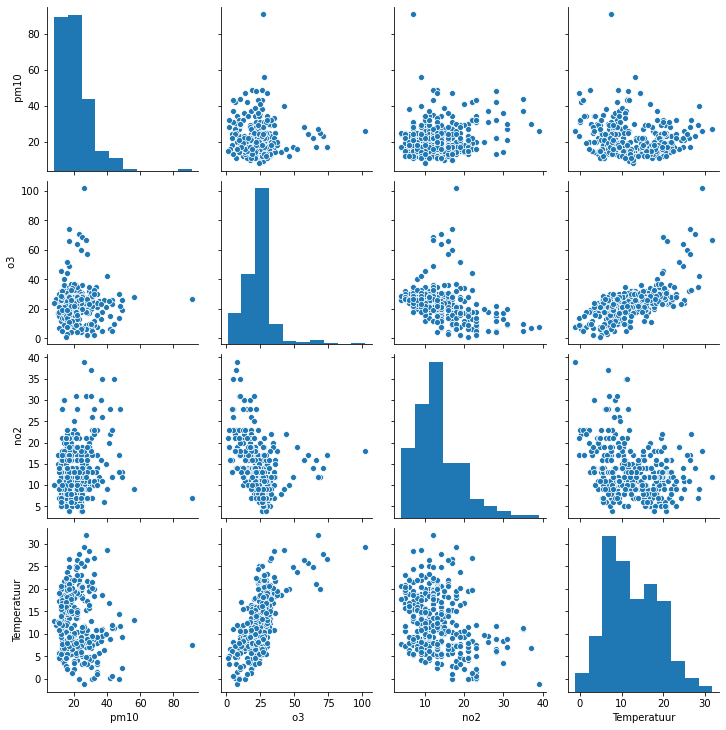

In [28]:
sns.pairplot(amsterdamse_veerkade1)

In [29]:
rebecquestraat = pd.read_csv('rebecquestraat.csv',index_col='time',parse_dates=['time'] )
print(len(rebecquestraat))

365


In [31]:
rebecque = data_cleaned_grp_grp1.get_group('70:ee:50:12:4d:42')
rebecque

,station_id,time,Unnamed: 0,Unnamed: 0.1,Temperature,CO2,Humidity,Pressure,Noise,Rain,WindStrength,WindAngle,GustStrength,GustAngle,latitude,longitude,year,month,day
5840,70:ee:50:12:4d:42,2019-01-01 00:00:00+00:00,7071198.0,290.0,8.167528,NaN,84.538745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,1.0,1.0
5841,70:ee:50:12:4d:42,2019-01-02 00:00:00+00:00,7071476.0,568.0,6.607368,NaN,74.870175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,1.0,2.0
5842,70:ee:50:12:4d:42,2019-01-03 00:00:00+00:00,7071757.5,849.5,5.415827,NaN,87.305755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,1.0,3.0
5843,70:ee:50:12:4d:42,2019-01-04 00:00:00+00:00,7072044.0,1136.0,6.115593,NaN,85.928814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,1.0,4.0
5844,70:ee:50:12:4d:42,2019-01-05 00:00:00+00:00,7072334.0,1426.0,7.500351,NaN,86.828070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,70:ee:50:12:4d:42,2019-12-27 00:00:00+00:00,7174510.5,103602.5,5.080986,NaN,92.172535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,12.0,27.0
6201,70:ee:50:12:4d:42,2019-12-28 00:00:00+00:00,7174794.0,103886.0,3.495406,NaN,91.851590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,12.0,28.0
6202,70:ee:50:12:4d:42,2019-12-29 00:00:00+00:00,7175077.5,104169.5,3.743662,NaN,88.232394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,12.0,29.0
6203,70:ee:50:12:4d:42,2019-12-30 00:00:00+00:00,7175368.5,104460.5,5.899329,NaN,76.939597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.081968,4.293328,2019.0,12.0,30.0


In [32]:
rebecque = rebecque.drop(['time','station_id', 'Unnamed: 0', 'Humidity', 'latitude', 'longitude', 'year', 'month', 'day'], axis=1)

In [33]:
Temperatuur2 = []
for i in rebecque.Temperature:
    value = i
    print(value)
    Temperatuur2.append(value)
    
print(len(Temperatuur2))

8.16752767527676
6.607368421052628
5.415827338129501
6.1155932203389725
7.500350877192977
7.140209790209789
8.177076411960138
7.675265017667845
5.690175438596492
4.823076923076926
7.14042553191489
8.036789297658865
8.74158075601374
6.437062937062935
7.736470588235311
6.7297202797202775
4.915331010452969
2.6222614840989382
0.6249158249158248
-0.285314685314685
1.12902097902098
0.3587248322147653
0.16385964912280682
1.3531468531468531
2.9716783216783194
7.725838926174509
6.243835616438355
4.950347222222224
3.2643333333333335
1.9370629370629375
0.4989510489510478
1.3671328671328686
3.7707070707070764
4.035664335664336
2.841608391608387
5.072053872053868
5.79895470383276
8.041034482758613
8.261188811188793
8.552786885245908
6.477351916376309
5.977003484320558
6.8287671232876725
7.397602739726027
7.368531468531464
8.996842105263163
9.337966101694919
10.537959183673463
9.460489510489497
7.713240418118465
8.330201342281894
8.460139860139861
8.886315789473686
9.085234899328864
8.73999999999999

In [34]:
rebecquestraat['Temperatuur'] = Temperatuur2

In [35]:
rebecquestraat1 = rebecquestraat.apply(pd.to_numeric, errors='coerce')
rebecquestraat1.dtypes

 pm25          float64
 pm10          float64
 o3            float64
 no2           float64
Temperatuur    float64
dtype: object

In [36]:
# rebecquestraat.convert_objects(convert_numeric = True)
rebecquestraat1.corr(method = 'pearson')

,pm25,pm10,o3,no2,Temperatuur
pm25,1.000000,0.565722,-0.188166,0.406961,-0.308905
pm10,0.565722,1.000000,-0.122084,0.512767,-0.258614
o3,-0.188166,-0.122084,1.000000,-0.455877,0.646402
no2,0.406961,0.512767,-0.455877,1.000000,-0.406403
Temperatuur,-0.308905,-0.258614,0.646402,-0.406403,1.000000


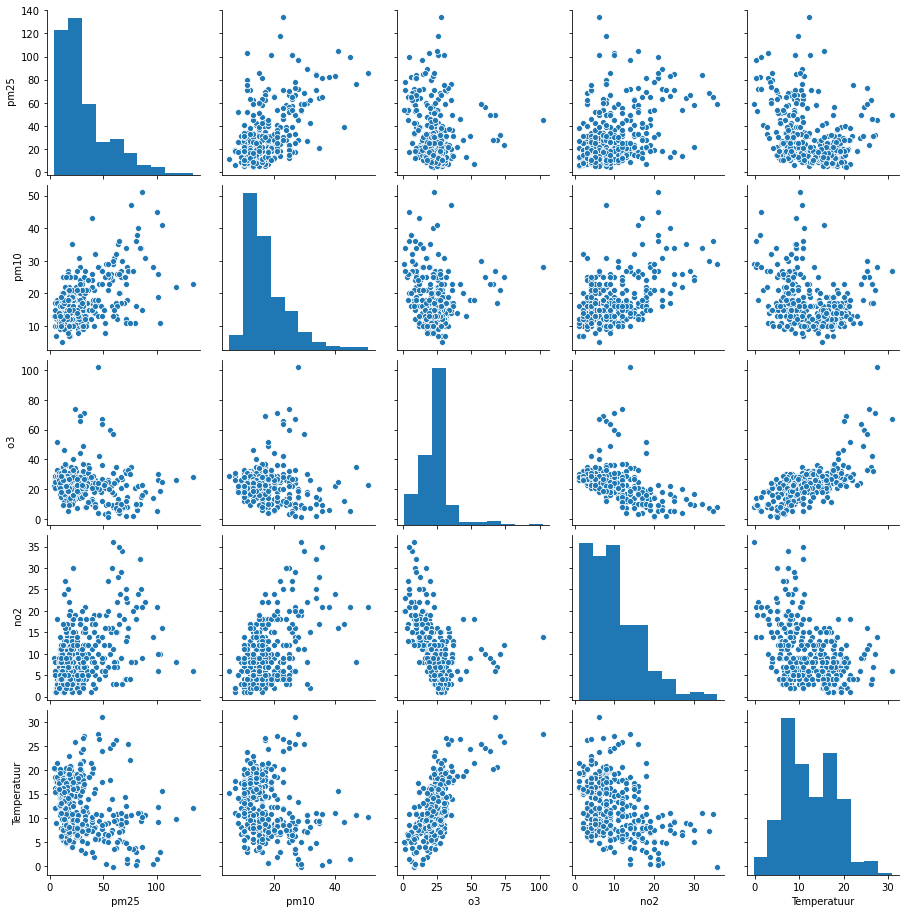

In [35]:
sns.pairplot(rebecquestraat1)

In [ ]:
# UHI1 =[]
# for i, j in zip(amsterdamseveer.Temperature, ruraltemp):
#     value = i - j
#     if value <= 0:
#         value = 0
#     UHI1.append(value)
#     print(value)
# UHI1

In [325]:
data_group = data_cleaned.groupby('station_id')

In [326]:
for i in data_group:
    print(len(i[1]))

105418
86806
105768
102344
101654
104610
101844
87410
104825
102090
98172
106022
92807
105416
95493
47051
105871
64027
103567
101830
104983
105911
104471
103217
103138
105390
104494
84380
98696
104151
105349
99070
105599
91507
104432
104495
84284
102239
106567
104826
83018
104718
103747
98614
104156
92976
82133
71693
99122
104711
100045
104931
104274
100840
106095
85674
105172
102068
93124
103618
91601
92979
103384
103559
105633
104411
99221
96973
104541
105461
92379
105517
97572
104660
96753
99750
98787
104456
96633
96845
101572
86608
105986
102841
98532
103631
96735
104305
102723
101258
104818
97931
95432
103910
103685
100517
104506
92455
103702
104160
101640
91531
93603
101370
103436
105176
73862
105950
104728
104706
105248
91157
99309
105331
105061
103342
103053
103980
89085
104903
105632
89675
95293
60359
97793
104049
103764
105092
105652
92109
